declaring the most important libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import sklearn.linear_model
import matplotlib.dates as mdates

In [ ]:
root_directory = os.getcwd()
print(root_directory)

/content


In [ ]:
data_path = os.path.join(root_directory, "data/Hourly_runoff.xlsx")
print(data_path)

/content/data/Hourly_runoff.xlsx


In [ ]:
Hourly_runoff = pd.read_excel('/content/Hourly_runoff.xlsx')

In [ ]:
Hourly_runoff.head()

,Date,Runoff (m3/s)
0,2018-01-08 00:59:00,0.495995
1,2018-01-08 01:59:00,0.490064
2,2018-01-08 02:59:00,0.48541
3,2018-01-08 03:59:00,0.47294
4,2018-01-08 04:59:00,0.470238


In [ ]:
Hourly_runoff.head(10)

,Date,Runoff (m3/s)
0,2018-01-08 00:59:00,0.495995
1,2018-01-08 01:59:00,0.490064
2,2018-01-08 02:59:00,0.48541
3,2018-01-08 03:59:00,0.47294
4,2018-01-08 04:59:00,0.470238
5,2018-01-08 05:59:00,0.469632
6,2018-01-08 06:59:00,0.473973
7,2018-01-08 07:59:00,0.481506
8,2018-01-08 08:59:00,0.469633
9,2018-01-08 09:59:00,0.466887


In [ ]:
Hourly_runoff['Date'] = Hourly_runoff.Date.apply(lambda x: pd.to_datetime(x,dayfirst=False))
Hourly_runoff.set_index(Hourly_runoff['Date'],inplace=True)
Hourly_runoff = Hourly_runoff.drop(columns=['Date'])

In [ ]:
Hourly_runoff['Runoff (m3/s)'] = pd.to_numeric(Hourly_runoff['Runoff (m3/s)'], errors='coerce')
Hourly_runoff

,Runoff (m3/s)
Date,
2018-01-08 00:59:00,0.495995
2018-01-08 01:59:00,0.490064
2018-01-08 02:59:00,0.485410
2018-01-08 03:59:00,0.472940
2018-01-08 04:59:00,0.470238
...,...
2020-12-28 04:59:00,6.242112
2020-12-28 05:59:00,6.165206
2020-12-28 06:59:00,6.106803


<Axes: xlabel='Date'>

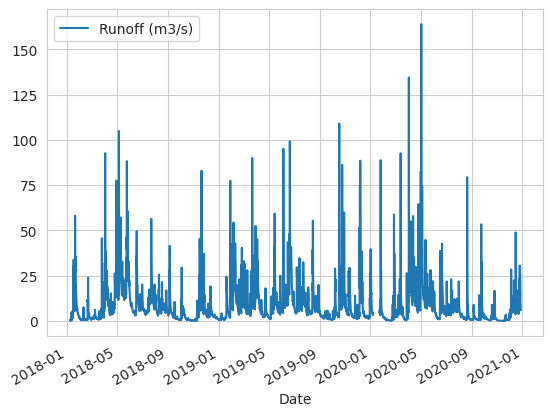

In [ ]:
Hourly_runoff.plot()

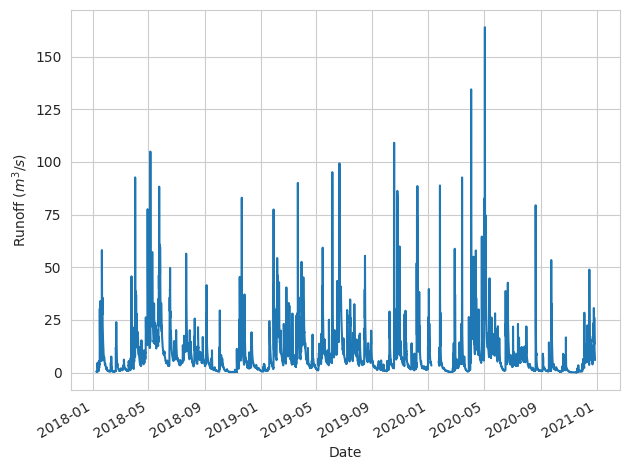

In [ ]:
fig, ax = plt.subplots()
Hourly_runoff.plot(ax=ax)
plt.ylabel('Runoff ($m^3/s$)')
plt.legend().set_visible(False)
os.makedirs(os.path.join(root_directory, "figures"), exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(root_directory+'/figures', 'Runoff_plot.jpg'), format='jpg', dpi =300)

In [ ]:
data_path = os.path.join(root_directory, "/content/Hourly_precipitation.csv")
print(data_path)
Hourly_pcp = pd.read_csv(data_path)
Hourly_pcp

/content/Hourly_precipitation.csv


,Date_yy/mm/dd_hh:mm:ss,tip_corrected_mm,Cumulated_precipitation_Texas_mm
0,2012-09-27 12:00:00,0.108980,0.108980
1,2012-09-27 13:00:00,4.904100,5.013080
2,2012-09-27 14:00:00,2.724500,7.737580
3,2012-09-27 15:00:00,2.179600,9.917180
4,2012-09-27 16:00:00,0.544900,10.462080
...,...,...,...
80971,2021-12-23 07:00:00,0.111362,10424.182458
80972,2021-12-23 08:00:00,0.000000,10424.182458
80973,2021-12-23 09:00:00,0.000000,10424.182458
80974,2021-12-23 10:00:00,0.000000,10424.182458


In [ ]:
Hourly_pcp = Hourly_pcp.rename(columns={'Date_yy/mm/dd_hh:mm:ss': 'Date'})
Hourly_pcp['Date'] = Hourly_pcp.Date.apply(lambda x: pd.to_datetime(x,dayfirst=False))
Hourly_pcp = Hourly_pcp.drop(columns=['Cumulated_precipitation_Texas_mm'])
Hourly_pcp

,Date,tip_corrected_mm
0,2012-09-27 12:00:00,0.108980
1,2012-09-27 13:00:00,4.904100
2,2012-09-27 14:00:00,2.724500
3,2012-09-27 15:00:00,2.179600
4,2012-09-27 16:00:00,0.544900
...,...,...
80971,2021-12-23 07:00:00,0.111362
80972,2021-12-23 08:00:00,0.000000
80973,2021-12-23 09:00:00,0.000000
80974,2021-12-23 10:00:00,0.000000


In [ ]:
Hourly_pcp.set_index(Hourly_pcp['Date'],inplace=True)
Hourly_pcp = Hourly_pcp.drop(columns=['Date'])
Hourly_pcp['tip_corrected_mm'] = pd.to_numeric(Hourly_pcp['tip_corrected_mm'], errors='coerce')
Hourly_pcp = Hourly_pcp.sort_index()
Hourly_pcp.head(6)

,tip_corrected_mm
Date,
2012-09-27 12:00:00,0.10898
2012-09-27 13:00:00,4.90410
2012-09-27 14:00:00,2.72450
2012-09-27 15:00:00,2.17960
2012-09-27 16:00:00,0.54490
2012-09-27 17:00:00,4.35920


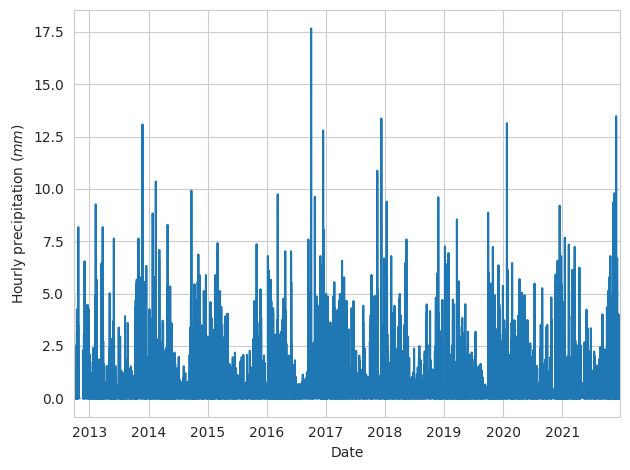

In [ ]:
fig, ax = plt.subplots()
Hourly_pcp.plot(ax=ax)
plt.ylabel('Hourly precipitation ($mm$)')
plt.legend().set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(root_directory+'/figures', 'Precipitation_plot.jpg'), format='jpg', dpi =300)

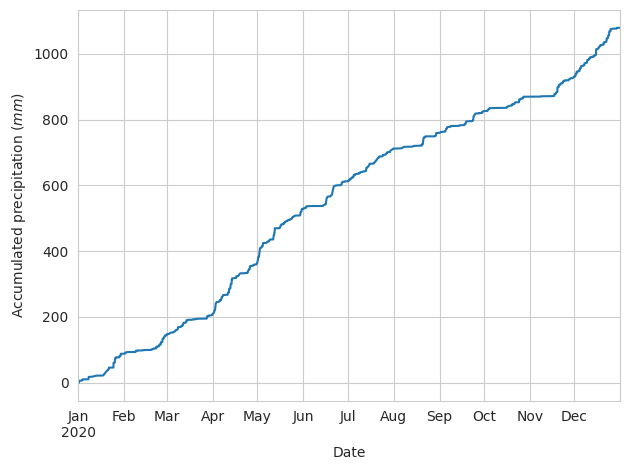

In [ ]:
fig, ax = plt.subplots()
Hourly_pcp.loc['2020'].cumsum().plot(ax=ax)
plt.ylabel('Accumulated precipitation ($mm$)')
plt.legend().set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(root_directory+'/figures', 'Cumulated_precipitation.jpg'), format='jpg', dpi =300)

In [ ]:
Hourly_runoff.index = Hourly_runoff.index.round(freq='H')
Hourly_pcp.index = Hourly_pcp.index.round(freq='H')
Hourly_data = pd.concat([Hourly_runoff, Hourly_pcp],axis=1, join='outer')
Hourly_data

<ipython-input-31-f138569e5e45>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Hourly_runoff.index = Hourly_runoff.index.round(freq='H')
<ipython-input-31-f138569e5e45>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Hourly_pcp.index = Hourly_pcp.index.round(freq='H')


,Runoff (m3/s),tip_corrected_mm
Date,,
2012-09-27 12:00:00,NaN,0.108980
2012-09-27 13:00:00,NaN,4.904100
2012-09-27 14:00:00,NaN,2.724500
2012-09-27 15:00:00,NaN,2.179600
2012-09-27 16:00:00,NaN,0.544900
...,...,...
2021-12-23 07:00:00,NaN,0.111362
2021-12-23 08:00:00,NaN,0.000000
2021-12-23 09:00:00,NaN,0.000000


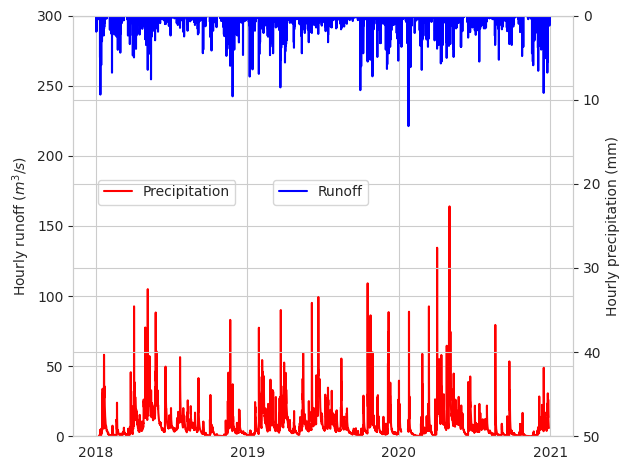

In [ ]:
start_analysis='2018'
end_analysis='2020'
fig,ax = plt.subplots()
plt.ylim(ymax=300)
ax2 = ax.twinx()
plt.ylim(ymax=50)
ax.plot(Hourly_data['Runoff (m3/s)'][start_analysis:end_analysis],color='red',label='Precipitation')
ax2.plot(Hourly_data['tip_corrected_mm'][start_analysis:end_analysis],color='blue',label='Runoff')
plt.gca().invert_yaxis()
ax.legend(loc=(0.05,0.55))
ax2.legend(loc=(0.4,0.55))
ax.set_ylabel('Hourly runoff ($m^3/s$)')
ax2.set_ylabel('Hourly precipitation (mm)')
ax2.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(root_directory+'/figures', 'Precipitation_vs_runoff.jpg'), format='jpg', dpi =300)

In [ ]:
# Select a Linear Model
Hourly_data = Hourly_data.dropna()
X = Hourly_data['tip_corrected_mm'][Hourly_data['tip_corrected_mm']>0].to_numpy()
X_reshaped = X.reshape(-1, 1)
Y = Hourly_data['Runoff (m3/s)'][Hourly_data['tip_corrected_mm']>0].to_numpy()
Y_reshaped = Y.reshape(-1, 1)
model = sklearn.linear_model.LinearRegression()

In [ ]:
# Train the Model
model.fit(X_reshaped,Y_reshaped)

LinearRegression()

In [ ]:
X_new = [[20]]
print(model.predict(X_new))

[[26.42417757]]


NameError: name 'y_hat' is not defined

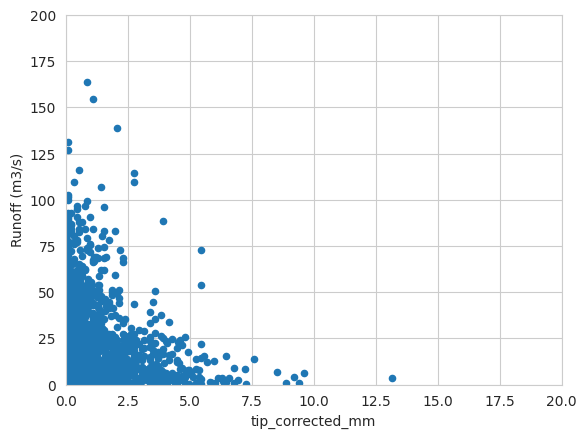

In [ ]:
# Visualize Data
Hourly_data[Hourly_data['tip_corrected_mm']>0].plot(kind='scatter', x='tip_corrected_mm', y='Runoff (m3/s)', xlim=(0, 20), ylim=(0,200))
plt.plot(X, y_hat, c='red')
plt.show()